In [2]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa

In [7]:
def filter(audio, times):
    '''
    y[n] = 0.75*A + 0.25*B
    A = x[n] + 1.5*B - 0.5*C
    B = (z^-1) A
    C = (z^-1) B
    '''

    original_audio = audio.copy() 
    output = original_audio.copy() 

    for _ in range(times):

        a = 0.0
        b = 0.0
        c = 0.0

        for n in range(len(original_audio)):
            x_n = original_audio[n]

            c = b # prev b
            b = a # prev a
            a = x_n + (1.5 * b) - (0.5 * c)

            output[n] = (0.75 * a) + (0.25 * b)

        original_audio = output.copy() 

    return output


filter_times = [1, 5]

rate, data = wav.read("ilberortaylı-sentence.wav")
data = data.astype(np.float32) / 32768.0

for times in filter_times:

    filtered = filter(data, times)

    #filtered = np.clip(filtered, -1.0, 1.0)
    filtered_int16 = np.int16(filtered * 32767)

    wav.write(f"ilber_new_{times}.wav", rate, filtered_int16)


    print(f"Audio filtered {times} times")

Audio filtered 1 times
Audio filtered 5 times


/var/folders/s9/wz1k655d35d6xt768r8wpj940000gn/T/ipykernel_74861/2088320511.py:42: RuntimeWarning: invalid value encountered in cast
  filtered_int16 = np.int16(filtered * 32767)


In [5]:
def filter(audio, times):
    '''
    y[n] = 0.75*A + 0.25*B
    A = x[n] + 1.5*B - 0.5*C
    B = (z^-1) A
    C = (z^-1) B
    '''

    original_audio = audio.copy() 
    output = original_audio.copy() 

    for _ in range(times):

        a = 0.0
        b = 0.0
        c = 0.0

        for n in range(len(original_audio)):
            x_n = original_audio[n]

            c = b # prev b
            b = a # prev a
            a = x_n + (1.5 * b) - (0.5 * c)

            output[n] = (0.75 * a) + (0.25 * b)

        original_audio = output.copy() 

    return output


filter_times = [1, 5, 100]

data, rate = librosa.load("ilberortaylı-sentence.wav", sr=None)
data = data.astype(np.float32) / 32768.0

for times in filter_times:

    filtered = filter(data, times)

    #filtered = np.clip(filtered, -1.0, 1.0)
    filtered_int16 = np.int16(filtered * 32767)

    wav.write(f"ilber_new_{times}.wav", rate, filtered_int16)


    print(f"Audio filtered {times} times")

Audio filtered 1 times


/var/folders/s9/wz1k655d35d6xt768r8wpj940000gn/T/ipykernel_83125/3141944623.py:42: RuntimeWarning: invalid value encountered in cast
  filtered_int16 = np.int16(filtered * 32767)


Audio filtered 5 times


/var/folders/s9/wz1k655d35d6xt768r8wpj940000gn/T/ipykernel_83125/3141944623.py:25: RuntimeWarning: overflow encountered in cast
  output[n] = (0.75 * a) + (0.25 * b)
/var/folders/s9/wz1k655d35d6xt768r8wpj940000gn/T/ipykernel_83125/3141944623.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  a = x_n + (1.5 * b) - (0.5 * c)


Audio filtered 100 times


/var/folders/s9/wz1k655d35d6xt768r8wpj940000gn/T/ipykernel_83125/3141944623.py:42: RuntimeWarning: overflow encountered in multiply
  filtered_int16 = np.int16(filtered * 32767)


In [ ]:
def custom_system(x):
    """
    Here are the equations for the given system:
      A[n] = x[n] + 1.5 * B[n] - 0.5 * C[n]
      B[n] = A[n-1]
      C[n] = B[n-1]
      y[n] = 0.75 * A[n] + 0.25 * B[n]
    """
    N = len(x)
    A = np.zeros(N)
    B = np.zeros(N)
    C = np.zeros(N)
    y = np.zeros(N)

    for n in range(N):
        if n == 0:
            B[n] = 0
            C[n] = 0
        else:
            B[n] = A[n-1]
            if n == 1:
                C[n] = 0
            else:
                C[n] = B[n-1]
        A[n] = x[n] + 1.5 * B[n] - 0.5 * C[n]
        y[n] = 0.75 * A[n] + 0.25 * B[n]
    return y

filter_times = [1, 5, 100]

data, rate = librosa.load("ilberortaylı-sentence.wav", sr=None)
data = data.astype(np.float32) / 32768.0

for times in filter_times:

    filtered = filter(data)

    #filtered = np.clip(filtered, -1.0, 1.0)
    filtered_int16 = np.int16(filtered * 32767)

    wav.write(f"ilber_new_{times}.wav", rate, filtered_int16)


    print(f"Audio filtered {times} times")

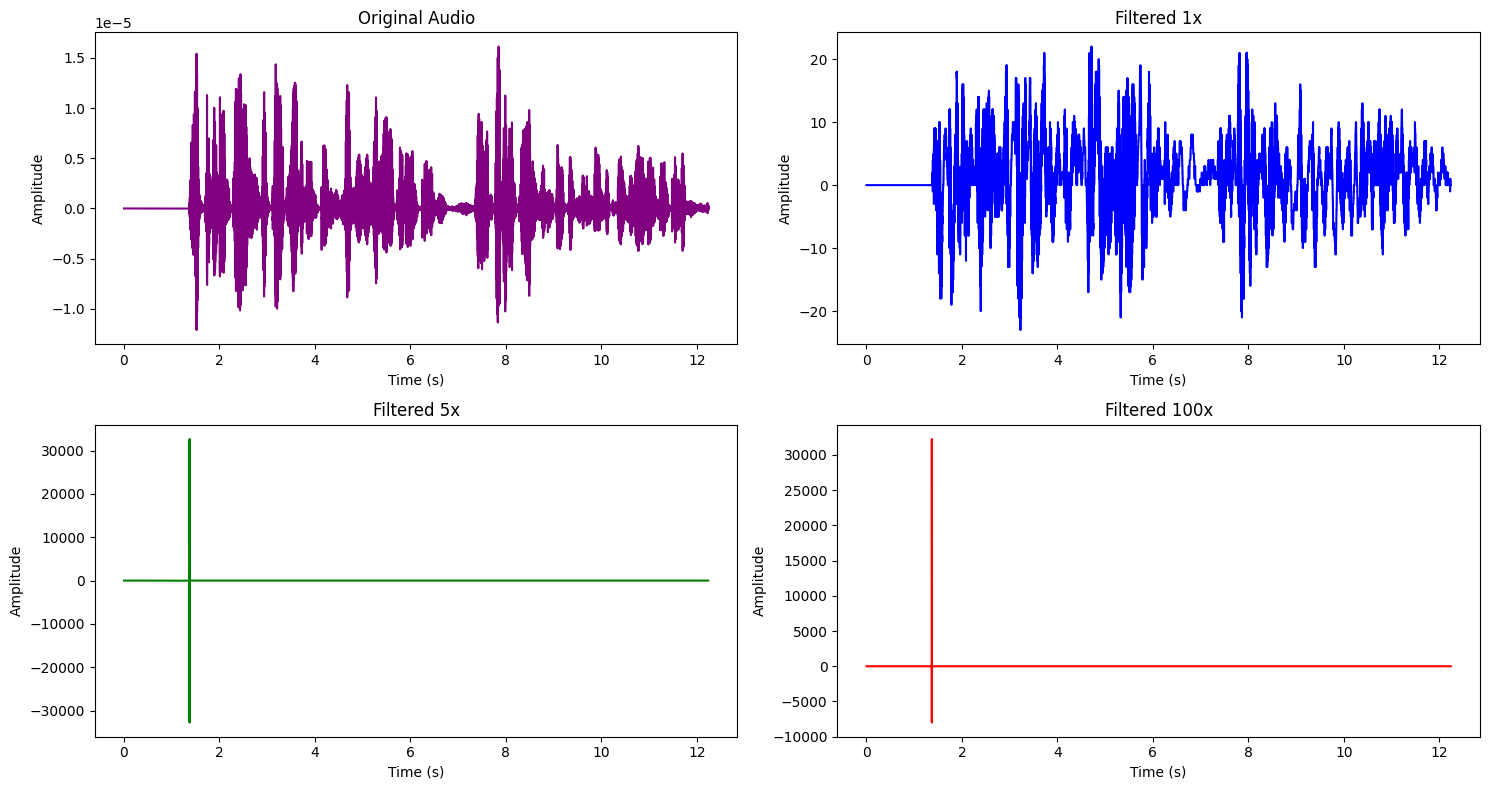

In [6]:
colors = ["blue", "green", "red"]

plt.figure(figsize=(15, 8))
time_original = np.linspace(0, len(data) / rate, num=len(data))
plt.subplot(2, 2, 1)
plt.plot(time_original, data, color="purple")
plt.title("Original Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

for i in range(len(filter_times)):
    rate, ilber_filtered_audio = wav.read(f"ilber_new_{filter_times[i]}.wav")

    time_axis = np.linspace(0, len(ilber_filtered_audio) / rate, num=len(ilber_filtered_audio))

    plt.subplot(2, 2, i + 2)
    plt.plot(time_axis, ilber_filtered_audio, color=colors[i])
    plt.title(f"Filtered {filter_times[i]}x")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")




plt.tight_layout()
plt.show()
